Sidharth Dhawan | 102218069 | BS3

Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

1. Load Dataset using the Pandas Library

In [21]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Data Preprocessing

In [22]:
print("Missing values in dataset:\n", df.isnull().sum())

print("\nDataset Statistics:\n", df.describe())

print("\nData Types:\n", df.dtypes)

Missing values in dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000      

3. Feature Selection, Scaling and Splitting the dataset into training and testing sets.

In [23]:
# Features
X = df.drop(columns=['quality']) 

# Target variable
y = df['quality']  

# Convert target variable into binary classification: Good (>=6) vs Bad (<6)
y = np.where(y >= 6, 1, 0)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows, Testing set size: {X_test.shape[0]} rows")


Training set size: 1279 rows, Testing set size: 320 rows


4. Train Decision Tree Classifier using the training data, and predict the target variable for test data using the trained classifier

In [24]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)  # You can try 'entropy' as well
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

5. Evaluate the performance of the classifier using accuracy, precision,
recall, and F1-score metrics.

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.725
Precision: 0.7935483870967742
Recall: 0.6871508379888268
F1-score: 0.7365269461077845

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71       141
           1       0.79      0.69      0.74       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.73      0.72      0.73       320



6. Visualizing the Decision Tree

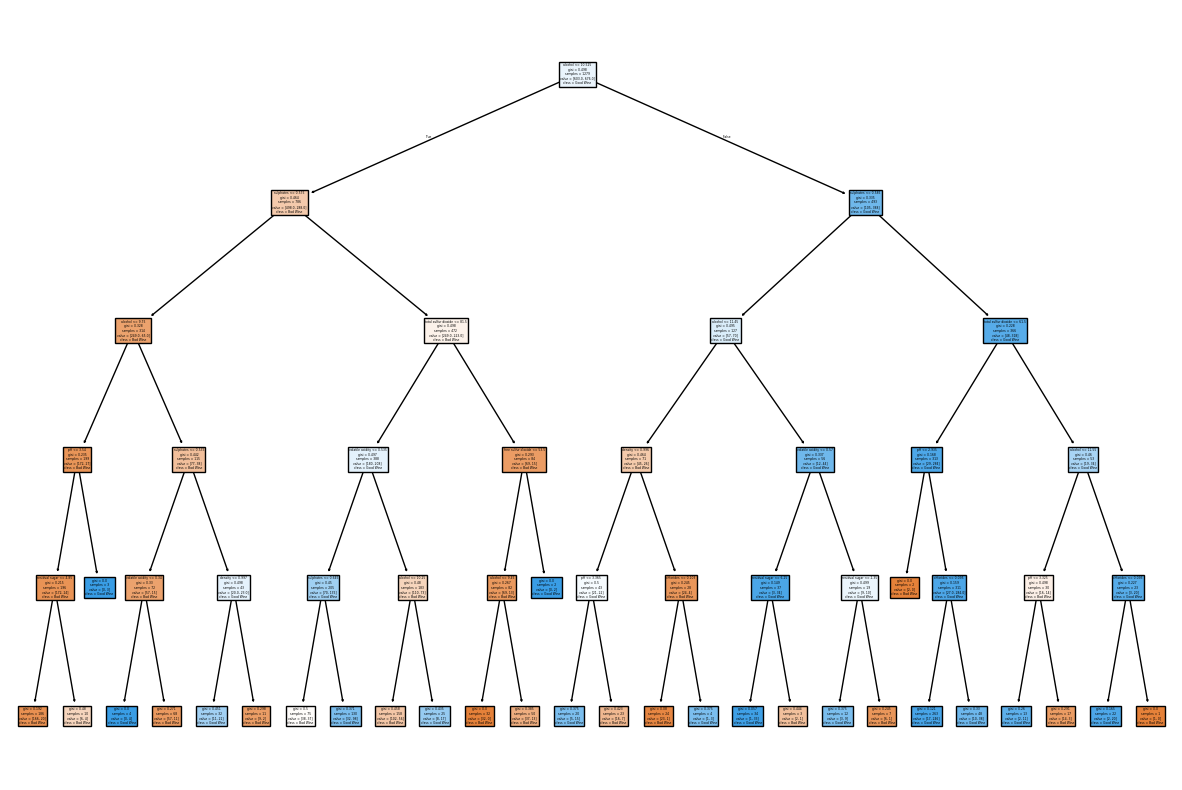

In [26]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Bad Wine', 'Good Wine'], filled=True)
plt.show()